In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import io
%matplotlib inline
import seaborn as sns

We are importing the main libraries that we need. Further down I will import several more

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (2).csv


This little project is made in Google Colab. This line is needed to work with a csv file

In [0]:
dataset= pd.read_csv(io.BytesIO(uploaded['train.csv'])) #Reading the uploaded csv

In [0]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [0]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

As we can see, we have number of columns,twelve to be exact.As we all know, neural networks love data, and I will try to minimize the loss of data.

In [0]:
feature_columns = dataset[['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']]

I selected this columns, dropping only PassengerId and the name of the passenger, but as we go down further I will drop a few more, because if I will the column with whatever the value is, it might change the whole correlation between each column and the dependant variable.

In [0]:
survived = dataset['Survived'].values #This is the dependant variable

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


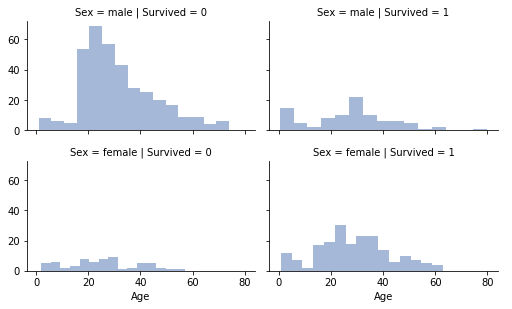

In [0]:
grid = sns.FacetGrid(dataset, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=15)
grid.add_legend();

As we can see the mortality rate in the men department is much higher. This is all logical, because as we know, the women and children are first on the life boats. And we can conclude one additional thing, a lot more younger men died that night, than older ones.

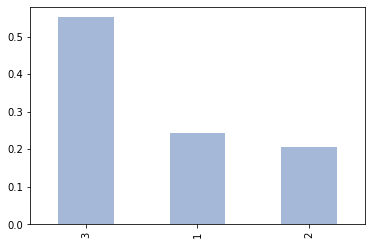

In [0]:
feature_columns['Pclass'].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.show()

Here the third class passengers are the majority,they are two times the first and the second class.

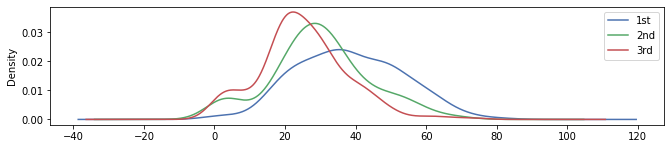

In [0]:
plt.figure(figsize=(17,10))
plt.subplot2grid((4,3),(2,0),colspan=2)
for i in [1,2,3]:
  feature_columns.Age[feature_columns.Pclass == i].plot(kind='kde')
plt.legend(('1st','2nd','3rd'))
plt.show()

This graphic shows us that the younger the passenger is, the more likely he/she is to buy a cheaper class - third class in this case.

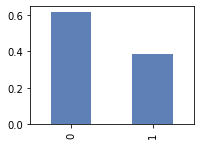

In [0]:
plt.figure(figsize=(17,10))
plt.subplot2grid((4,5),(0,0))
dataset.Survived.value_counts(normalize=True).plot(kind='bar',alpha=0.9)
plt.show()

It is shown that as many as 60 percent of the passengers have dies in this accident.

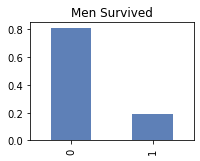

In [0]:
plt.figure(figsize=(17,10))
plt.subplot2grid((4,5),(0,0))
dataset['Survived'][feature_columns['Sex']=='male'].value_counts(normalize=True).plot(kind='bar',alpha=0.9)
plt.title('Men Survived')
plt.show()

No matter the money posession, or anything else really, the mortality in this graph dedicated to the men, speaks for itself.

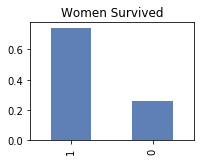

In [0]:
plt.figure(figsize=(17,10))
plt.subplot2grid((4,5),(0,0))
dataset['Survived'][feature_columns['Sex']=='female'].value_counts(normalize=True).plot(kind='bar',alpha=0.9)
plt.title('Women Survived')
plt.show()

It for sure is different for the women, they are as high as 70 percent saved.

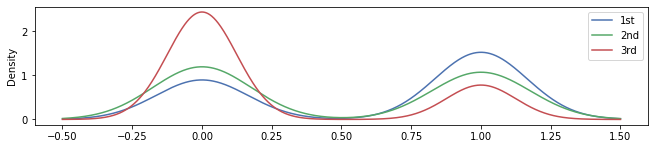

In [0]:
plt.figure(figsize=(17,10))
plt.subplot2grid((4,3),(2,0),colspan=2)
for i in [1,2,3]:
  dataset.Survived[feature_columns.Pclass == i].plot(kind='kde')
plt.legend(('1st','2nd','3rd'))
plt.show()

Here we can see that the passengers in the lowest class-third class, has the highest mortality rate of the three.

In [0]:
for i in feature_columns.columns:
  if feature_columns[i].isnull().any():
    print(i)
  else:
    print('not in that column  ' + i)

not in that column  Pclass
not in that column  Sex
Age
not in that column  SibSp
not in that column  Parch
not in that column  Ticket
not in that column  Fare
Cabin
Embarked


Checking if the columns contains NaN values, because as we all know, they are not to be messed with, and sometimes the model does not work properly if we do not get rid of them.

In [0]:
feature_columns['Age'] = feature_columns['Age'].fillna(feature_columns['Age'].mean()) #Filling the column with mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
feature_columns['Age'].isnull().any()

False

I filled the missing values which were not so much, with the mean of the column.It is a common practice to do so.

In [0]:
feature_columns['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
D              3
F2             3
              ..
D56            1
E77            1
C49            1
E31            1
B39            1
Name: Cabin, Length: 147, dtype: int64

In [0]:
feature_columns = feature_columns.drop('Cabin',axis=1)

Even though this column contains some data, I do not think it will contribute with something. Moreover it is really hard to encode the data,and if somehow we encode it, I do not think it will represent the column at is it meant to be...so I dropped it

In [0]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
#Importing the necessary stuff

In [0]:
feature_columns = feature_columns.drop('Ticket',axis=1)

Same with the Ticket column,I better drop it because it is really hard to encode, and it does not contribute with something important

In [0]:
feature_columns

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [0]:
le = LabelEncoder()
sex_column = le.fit_transform(feature_columns['Sex'])

In [0]:
sex_column = pd.DataFrame(sex_column)

In [0]:
feature_columns = feature_columns.drop('Sex',axis=1)

In [0]:
feature_columns['Sex'] = sex_column

Making an instance of the LabelEncoder in the latter cells.Encoding the Sex column, because it was categorical, which could lead to errors in the model later.

In [0]:
feature_columns

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,3,22.000000,1,0,7.2500,S,1
1,1,38.000000,1,0,71.2833,C,0
2,3,26.000000,0,0,7.9250,S,0
3,1,35.000000,1,0,53.1000,S,0
4,3,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,S,1
887,1,19.000000,0,0,30.0000,S,0
888,3,29.699118,1,2,23.4500,S,0
889,1,26.000000,0,0,30.0000,C,1


In [0]:
ohe = OneHotEncoder() #Making instance of OneHotEncoder

In [0]:
mapping = {'S':0,'C':1,'Q':2} 

In [0]:
feature_columns['Embarked'] = feature_columns['Embarked'].map(mapping) #Mapping categorical to numerical data

In [0]:
scaler = StandardScaler()
fare_scaler = StandardScaler()
age = scaler.fit_transform(np.reshape(feature_columns['Age'].values,(-1,1)))
fare = fare_scaler.fit_transform(np.reshape(feature_columns['Fare'].values,(-1,1)))

In [0]:
feature_columns = feature_columns.drop('Age',axis=1)

In [0]:
feature_columns = feature_columns.drop('Fare',axis=1)

In [0]:
feature_columns['Age'] = age
feature_columns['Fare'] = fare

Making two separate instance of StandardScaler. Before we fit_transform the target column, it has to be a tensor with nx1 dimensions. This is why it is a little bit unclear but it does the job in one line. Then we replace the old categorical columns with the encoded one.

In [0]:
X_train = feature_columns
X_train,X_test,y_train,y_test = train_test_split(feature_columns,survived,test_size=0.2) #Splitting the data

In [0]:
X_train['Embarked'] = X_train['Embarked'].fillna(0)
X_test['Embarked'].isnull().any() #More encoding 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


True

In [0]:
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.models import Sequential
from tensorflow import keras #Importing the needed layers and models from tensorflow.keras

In [0]:
model = Sequential()

model.add(Dense(32, input_dim=X_train.shape[1], activation="relu", kernel_initializer="he_normal"))
model.add(Dense(64, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dropout(0.3))

model.add(Dense(512, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(512, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(512, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dropout(0.3))

model.add(Dense(512, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(512, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(512, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dropout(0.3))

model.add(Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(64, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(32, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dropout(0.3))

model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["binary_accuracy"])

The model is Sequential.That means we could add layers in this order forever or till the computer CPU(in this case) break somehow.
The model is pretty straightforward - the input_dim are the columns of the X_train dataset. The activation function I chose(which most people do in such network) is relu. It is firing only if the neuron output goes over value of 0. And this time I tried something new - the kernel_initializer. It is a way of setting the best or optimat weights in order the algorithm to converge faster and learn quicker. The last layers function is sigmoid. This is giving us a value between 0 and 1. We need the values to be 0 or 1. I will convert it with a simple for loop later. The Dropout layer is just preventing the overfitting of the model.
 The optimizer governs the change of the weights of the synapses. This is how  neural network learns. The loss - this is what we are after. We are trying to minimize it in order our algorithm to converge. It is binary because we have two outcomes - either 0 or 1. The metrics is just an extra to be output during training.

In [0]:
model.summary() #Self-explanatory

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_286 (Dense)            (None, 32)                256       
_________________________________________________________________
dense_287 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_288 (Dense)            (None, 128)               8320      
_________________________________________________________________
dropout_158 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_289 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_290 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_291 (Dense)            (None, 512)             

In [0]:
model.fit(X_train,y_train,batch_size=25,epochs=200,shuffle=True,verbose=1)

Train on 712 samples
Epoch 1/200
712/712 [==============================] - 1s 2ms/sample - loss: 0.7967 - binary_accuracy: 0.5871
Epoch 2/200
712/712 [==============================] - 1s 926us/sample - loss: 0.6587 - binary_accuracy: 0.6447
Epoch 3/200
712/712 [==============================] - 1s 910us/sample - loss: 0.5692 - binary_accuracy: 0.7514
Epoch 4/200
712/712 [==============================] - 1s 912us/sample - loss: 0.5315 - binary_accuracy: 0.7584
Epoch 5/200
712/712 [==============================] - 1s 906us/sample - loss: 0.5227 - binary_accuracy: 0.7809
Epoch 6/200
712/712 [==============================] - 1s 931us/sample - loss: 0.5029 - binary_accuracy: 0.7935
Epoch 7/200
712/712 [==============================] - 1s 912us/sample - loss: 0.4887 - binary_accuracy: 0.8132
Epoch 8/200
712/712 [==============================] - 1s 920us/sample - loss: 0.5045 - binary_accuracy: 0.7851
Epoch 9/200
712/712 [==============================] - 1s 946us/sample - loss: 0.4790

Here we are fitting the algorithm with our independant variables(X_train) and our dependant variable(y_train). The batch size indicates after what batch size the algorithm will calculate error function,backpropagate it and change the weights. Epochs is the number of times the algorithm will go through the dataset.Shuffle sometimes is important in order algorithm not be biased. Verbose is just a visual help during training

In [0]:
y_pred = model.predict(X_test) #Predicting the test set

In [0]:
y_pred_real = []
for i in y_pred:
  if i > 0.5:
    i = 1
    y_pred_real.append(i)
  else:
    i = 0
    y_pred_real.append(i)

As I mentioned earlier,our last layer has sigmoid function which squashes the output between 0 and 1. We need either of them. So I made a small for loop to deal with this problem, if value of the prediction is higher from 0.5, then make it 1,otherwise make it 0

In [0]:
from sklearn.metrics import confusion_matrix #Importing the confusion_matrix

In [0]:
cm = confusion_matrix(y_test,y_pred_real)
cm

array([[104,  14],
       [ 17,  44]])

In [0]:
true_predictions = cm[0][0] + cm[1][1]
false_predictions = cm[0][1] + cm[1][0]
total = true_predictions + false_predictions

In [0]:
true_predictions/total

0.8268156424581006

Importing the confusion matrix. As we can see, 104 + 44 are classified as true, and 17+14 are classified as false. In the next code cell I just add them together to calculate the percentage of right/total. It is 82 percent. It is a very good model,not overfit and not underfit. Like all algorithms it could be tweaked more, but it will cost computational time. We could add layers and so on. But I am happy with the result.